<a href="https://colab.research.google.com/github/rulocastellanos/practice_data_science_ml/blob/main/Addition_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explore dataset



In [2]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/add.csv')

In [6]:
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


In [7]:
import matplotlib.pyplot as plt

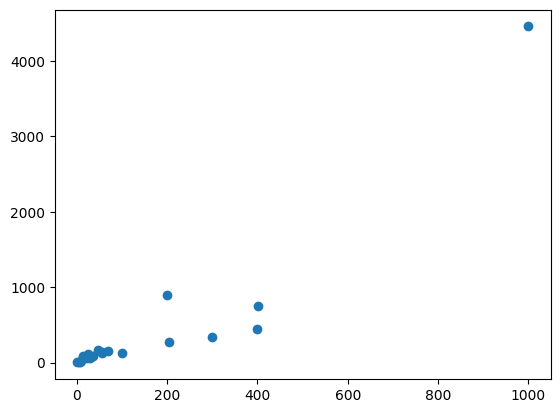

In [8]:
plt.scatter(data['x'], data['sum'])

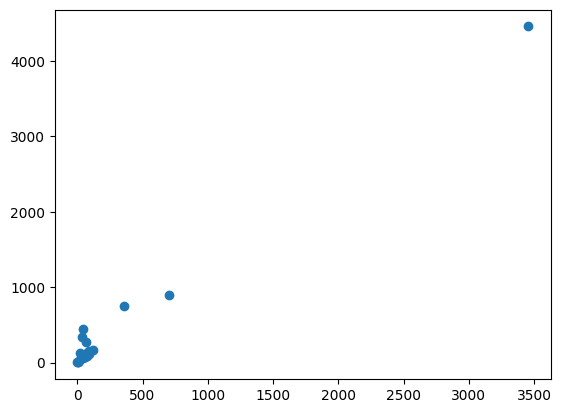

In [9]:
plt.scatter(data['y'], data['sum'])

Store X (independent variables) and y (dependent variable)

In [10]:
X = data[['x', 'y']]
y = data['sum']

Train / Test Split method.

In [11]:
#split method

from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X,
                                                    y,
                                                     test_size = .33, # .33 will be test
                                                     random_state= 42 # to get the same random sample

)

In [16]:
X_train

,x,y
3,10.0,10.0
4,30.0,30.0
17,400.0,45.7
12,12.5,56.7
18,34.6,56.9
16,203.6,67.9
2,6.0,6.0
9,56.0,78.0
21,1000.0,3456.0
7,100.0,22.0


# Train the model

We will train with linear model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

# Model prediction

How well our model works

In [20]:
model.score(X_train, y_train)

1.0

In [21]:
model.score(X_test, y_test)

1.0

# Compare the results

In [23]:
# On unseen sample

y_pred = model.predict(X_test)
y_pred

array([  2. , 112.9,  68. ,   8. , 900. ,  66. , 169.4, 334. ])

In [24]:
y_test

,sum
0,2.0
13,112.9
8,68.0
1,8.0
15,900.0
5,66.0
20,169.4
11,334.0


In [25]:
# compare in a Dataset

df = pd.DataFrame({ 'Actual':  y_test,
                   'Predicted' : y_pred

})
df

,Actual,Predicted
0,2.0,2.0
13,112.9,112.9
8,68.0,68.0
1,8.0,8.0
15,900.0,900.0
5,66.0,66.0
20,169.4,169.4
11,334.0,334.0


Predict

In [32]:
predict = model.predict([[34, 65]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
predict

array([99.])

In [34]:
predict = model.predict([[34, 6590]])
predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6624.])

# Save model usinf joblib

In [35]:
import joblib

In [37]:
joblib.dump(model, 'model_add_2_numbers')

['model_add_2_numbers']

In [38]:
model = joblib.load('model_add_2_numbers')

In [41]:
pred = model.predict([[2,2]])
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.])

GUI

In [42]:
X = data[['x', 'y']]
y = data['sum']

In [44]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [46]:
import joblib
joblib.dump(model, 'model_add_2_numbers')

['model_add_2_numbers']

In [47]:
model = joblib.load('model_add_2_numbers')
model.predict([[2,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.])

In [49]:
from tkinter import *
import joblib

In [54]:
import joblib
import ipywidgets as widgets
from IPython.display import display

def predict_sum(p1, p2):
    model = joblib.load('model_add_2_numbers')
    result = model.predict([[p1, p2]])
    output.clear_output()
    with output:
        print(f"Sum is: {result[0]}")

# Create input widgets
e1 = widgets.FloatText(description="Enter one:")
e2 = widgets.FloatText(description="Enter second:")

# Create a button to trigger prediction
button = widgets.Button(description="Predict")
output = widgets.Output()

# Define the button click event
def on_button_click(b):
    predict_sum(e1.value, e2.value)

button.on_click(on_button_click)

# Display the widgets
display(e1, e2, button, output)


FloatText(value=0.0, description='Enter one:')

FloatText(value=0.0, description='Enter second:')

Button(description='Predict', style=ButtonStyle())

Output()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
